# **Quantitative structure-activity relationship (QSAR) Model Building of Coronavirus Inhibitors**


# Read in data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('05_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.675718
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.644548
83,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.412289
84,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.841638


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0     5.142668
1     5.026872
2     4.869666
3     4.882397
4     5.698970
        ...   
81    4.675718
82    3.644548
83    4.412289
84    4.841638
85    4.675718
Name: pIC50, Length: 86, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP34,PubchemFP37,...,PubchemFP710,PubchemFP712,PubchemFP716,PubchemFP734,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP797,PubchemFP818,PubchemFP821
0,0,0,1,1,0,0,0,0,0,0,...,1,0,1,1,1,0,1,1,0,1
1,0,0,1,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,1,1,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,0,0,0,1,0,0,0,0,...,1,1,0,1,0,1,0,1,1,0
82,1,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,1,0
83,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,1,0
84,0,1,0,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,1,1,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

# Random Forest Regression Model

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Train Model
np.random.seed(100)
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, Y_train)
r2_train = model.score(X_train, Y_train)
r2_train

0.9722253151326242

In [11]:
# Test Model
np.random.seed(100)
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_test, Y_test)
r2_test = model.score(X_test, Y_test)
r2_test

0.9502307539225325

In [12]:
# Overall
np.random.seed(100)
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9823703729243904

## Model Prediction

In [13]:
# Train
Y_pred_train = model.predict(X_train)
Y_pred_train

array([5.72571518, 1.        , 1.        , 1.        , 1.08850423,
       1.01758097, 4.67567119, 1.        , 1.02507042, 5.30960375,
       1.04055988, 3.94309841, 4.37174215, 4.27927089, 1.        ,
       1.        , 4.59972835, 1.06543648, 5.30960375, 4.7403073 ,
       1.215227  , 5.30960375, 4.88716381, 5.33718972, 4.98238068,
       1.        , 6.95417851, 4.40211812, 1.        , 4.93958562,
       1.01418303, 4.59928269, 5.76798705, 4.51793561, 1.        ,
       1.        , 4.81834534, 1.        , 1.01418303, 6.96347714,
       4.81521918, 1.01758097, 4.52558633, 4.76176153, 5.20340464,
       4.25497113, 1.        , 1.03255988, 5.17166898, 5.38735443,
       4.46480885, 5.02810171, 1.        , 4.48580856, 6.43610507,
       5.43842252, 4.6566675 , 6.42663577, 4.38432652, 5.04988601])

In [14]:
# Test
Y_pred_test = model.predict(X_test)
Y_pred_test

array([6.94706575, 4.98372116, 6.70793747, 1.00748945, 4.94291215,
       4.91697599, 4.91705981, 4.67567119, 5.51003002, 4.75680631,
       4.85673627, 4.84172138, 4.84920257, 6.63221798, 5.58767088,
       3.93176935, 1.01418303, 6.78446153, 4.85313723, 7.06450247,
       5.00694881, 1.        , 1.        , 1.        , 4.84560782,
       4.87815965])

In [15]:
# Overall
Y_pred = model.predict(X)
Y_pred

array([4.98372116, 5.17166898, 5.02810171, 5.30960375, 5.51003002,
       5.72571518, 5.33718972, 5.30960375, 5.30960375, 4.84560782,
       4.91705981, 5.00694881, 4.94291215, 4.59972835, 4.38432652,
       5.76798705, 4.67567119, 4.7403073 , 4.67567119, 4.37174215,
       5.43842252, 4.46480885, 1.00748945, 1.        , 1.06543648,
       1.        , 1.        , 1.        , 1.        , 1.03255988,
       1.        , 1.        , 1.01758097, 1.01418303, 1.02507042,
       1.        , 1.        , 1.        , 1.215227  , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.01758097,
       1.08850423, 1.01418303, 1.        , 1.01418303, 1.04055988,
       4.93958562, 5.04988601, 5.38735443, 4.84920257, 4.85313723,
       4.98238068, 4.91697599, 4.81521918, 4.81834534, 4.76176153,
       4.6566675 , 4.85673627, 5.58767088, 5.20340464, 4.84172138,
       4.87815965, 3.93176935, 4.75680631, 4.88716381, 4.51793561,
       6.70793747, 6.42663577, 7.06450247, 6.63221798, 6.43610

## Model Performance

In [16]:
# Train
print('[Train] Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('[Train] Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

[Train] Mean squared error (MSE): 0.08
[Train] Coefficient of determination (R^2): 0.98


In [17]:
# Test
print('[Test] Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('[Test] Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

[Test] Mean squared error (MSE): 0.07
[Test] Coefficient of determination (R^2): 0.98


In [18]:
# Overall
print('[Overall] Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('[Overall] Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

[Overall] Mean squared error (MSE): 0.08
[Overall] Coefficient of determination (R^2): 0.98


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

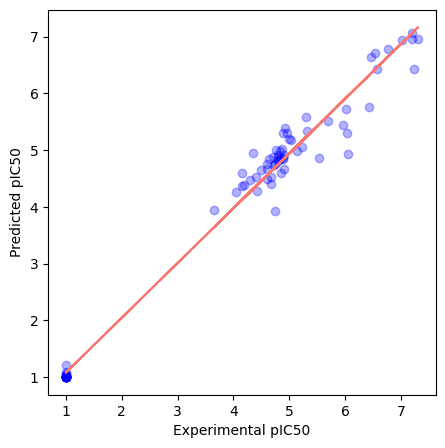

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="blue", alpha=0.3)

# Add trendline
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [21]:
import pickle
pickle.dump(model, open('pickle_model.pkl', 'wb'))